In [4]:
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('HousingData_Zillow_final.csv',  encoding='latin-1',header=0, index_col=0)
df.head()

,street,zipcode,city,state,latitude,longitude,price,bedrooms,bathrooms,finishedSqFt,...,yearUpdated,numFloors,view,parkingType,heatingSources,heatingSystem,rooms,neighborhood,schoolDistrict,homeDescription
zpid,,,,,,,,,,,,,,,,,,,,,
40000003,60 Montrose Ave,7023.0,FANWOOD,NJ,40.649677,-74.389070,NaN,3.0,1.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beautifully maintained and landscaped home con...
40000004,117 Pleasant Ave,7023.0,FANWOOD,NJ,40.649500,-74.388788,NaN,4.0,2.5,1641.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40000009,79 Pleasant Ave,7023.0,FANWOOD,NJ,40.648488,-74.389920,NaN,4.0,2.5,1969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Totally renovated colonial, open floor plan, h..."
40000010,75 Pleasant Ave,7023.0,FANWOOD,NJ,40.648331,-74.390096,NaN,3.0,2.0,1415.0,...,NaN,2.0,NaN,Garage - Attached,Gas,"Baseboard, Other","Office, Workshop, Family room, Laundry room",NaN,NaN,NEW PRICE!!!!! POSSIBILITIES ARE ENDLESS FOR S...
40000012,61 Pleasant Ave,7023.0,FANWOOD,NJ,40.648016,-74.390447,NaN,4.0,2.0,1356.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Charming Cape Cod Style home with an Oversized...


In [6]:
print("Dataframe has {} rows and {} columns.".format(*df.shape))

Dataframe has 1063 rows and 22 columns.


In [7]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

In [8]:
# Select the features from the data
#House_data = House_data[[0,1,2]]
df = df[[ 'homeDescription', 'latitude', 'longitude', 'bedrooms', 'bathrooms','finishedSqFt', 'lotSizeSqFt','yearBuilt', 'yearUpdated', 'numFloors', 'parkingType', 'heatingSources', 'heatingSystem', 'rooms' ]]

print("Dataframe has {} rows and {} columns.".format(*df.shape))
df.head()

Dataframe has 1063 rows and 14 columns.


,homeDescription,latitude,longitude,bedrooms,bathrooms,finishedSqFt,lotSizeSqFt,yearBuilt,yearUpdated,numFloors,parkingType,heatingSources,heatingSystem,rooms
zpid,,,,,,,,,,,,,,
40000003,Beautifully maintained and landscaped home con...,40.649677,-74.389070,3.0,1.5,NaN,10454.0,1964.0,NaN,NaN,NaN,NaN,NaN,NaN
40000004,NaN,40.649500,-74.388788,4.0,2.5,1641.0,9583.0,1951.0,NaN,NaN,NaN,NaN,NaN,NaN
40000009,"Totally renovated colonial, open floor plan, h...",40.648488,-74.389920,4.0,2.5,1969.0,7501.0,1950.0,NaN,NaN,NaN,NaN,NaN,NaN
40000010,NEW PRICE!!!!! POSSIBILITIES ARE ENDLESS FOR S...,40.648331,-74.390096,3.0,2.0,1415.0,7405.0,1950.0,NaN,2.0,Garage - Attached,Gas,"Baseboard, Other","Office, Workshop, Family room, Laundry room"
40000012,Charming Cape Cod Style home with an Oversized...,40.648016,-74.390447,4.0,2.0,1356.0,7501.0,1954.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
a = df['bedrooms'].unique()
print (sorted(a))

[1.0, 3.0, 4.0, nan, 2.0, 5.0, 6.0, 7.0, 8.0, 9.0]


In [10]:
#Cleanse numeric features
num_feats = ['bedrooms', 'bathrooms','finishedSqFt', 'lotSizeSqFt','yearBuilt', 'yearUpdated', 'numFloors']
df[num_feats] = df[num_feats].replace('[\$,]', '', regex=True)
df[num_feats] = df[num_feats].apply(pd.to_numeric, errors='coerce')
print("Dataframe has {} rows and {} columns.".format(*df.shape))


Dataframe has 1063 rows and 14 columns.


In [11]:

df.describe()

,latitude,longitude,bedrooms,bathrooms,finishedSqFt,lotSizeSqFt,yearBuilt,yearUpdated,numFloors
count,1058.000000,1058.000000,1017.000000,1018.000000,884.000000,1.055000e+03,1002.000000,171.000000,518.000000
mean,40.648493,-74.359670,3.411996,2.057024,1926.830317,3.036242e+05,1946.416168,2004.619883,2.009653
std,0.041694,0.050001,0.917016,0.740082,3410.255988,9.346682e+06,23.126708,16.354581,0.647793
min,39.835319,-74.776126,1.000000,1.000000,1.000000,5.200000e+01,1830.000000,1924.000000,1.000000
25%,40.638829,-74.387120,3.000000,1.500000,1347.500000,5.462500e+03,1930.000000,2005.000000,2.000000
50%,40.644940,-74.381143,3.000000,2.000000,1641.500000,7.405000e+03,1950.000000,2008.000000,2.000000
75%,40.650111,-74.327818,4.000000,2.500000,2060.500000,9.583000e+03,1957.000000,2013.000000,2.000000
max,41.161080,-74.121724,9.000000,5.500000,99999.000000,3.035696e+08,2018.000000,2018.000000,5.000000


In [12]:
# Remove where bedroom is more than 6
df = df.query('bedrooms <= 6')
print("Dataframe has {} rows and {} columns.".format(*df.shape))

Dataframe has 1012 rows and 14 columns.


In [13]:
a = df['bedrooms'].unique()
print (sorted(a))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


In [14]:
# rare category
df['parkingType'].value_counts()

Garage - Attached                                              295
Garage - Detached                                              120
Off-street                                                      41
Garage - Attached, Off-street                                   27
Garage - Detached, Off-street                                   20
On-street                                                       17
Off-street, On-street                                           13
Garage - Attached, Off-street, On-street                        11
Garage - Detached, Off-street, On-street                         8
Garage - Attached, On-street                                     8
Garage - Detached, On-street                                     5
None                                                             3
Garage - Detached, Garage - Attached, Off-street                 1
Garage - Attached, Garage - Detached, Off-street, On-street      1
Garage - Attached, Garage - Detached                          

In [15]:
#Value  = bed*bath*sqft*floor



C:\Users\anish\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\anish\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\anish\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


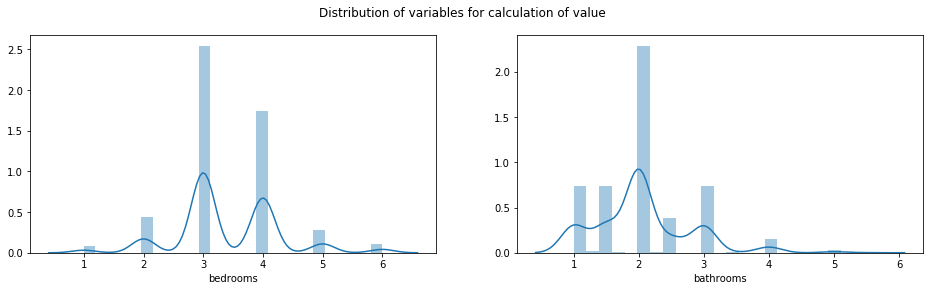

In [16]:
#Distribution of value
%matplotlib inline

fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of variables for calculation of value')
x_axis=df['bedrooms'].dropna()
sns.distplot(pd.Series(x_axis, name=x_axis.name), ax=axs[0])
x_axis=df['bathrooms'].dropna()
sns.distplot(pd.Series(x_axis, name=x_axis.name), ax=axs[1])


C:\Users\anish\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\anish\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\anish\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


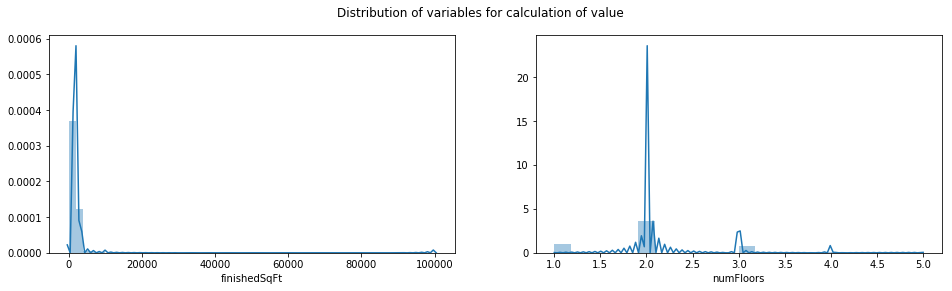

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of variables for calculation of value')

x_axis=df['finishedSqFt'].dropna()
sns.distplot(pd.Series(x_axis, name=x_axis.name), ax=axs[0])
x_axis=df['numFloors'].dropna()
sns.distplot(pd.Series(x_axis, name=x_axis.name), ax=axs[1])


In [18]:
# Calculate value

#Value  = (bed*bath)*sqft*floor

df['value'] = df['bedrooms'] *  df['bathrooms'] * df['finishedSqFt'] * df['numFloors']


print("Dataframe has {} rows and {} columns.".format(*df.shape))

Dataframe has 1012 rows and 15 columns.


C:\Users\anish\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\anish\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


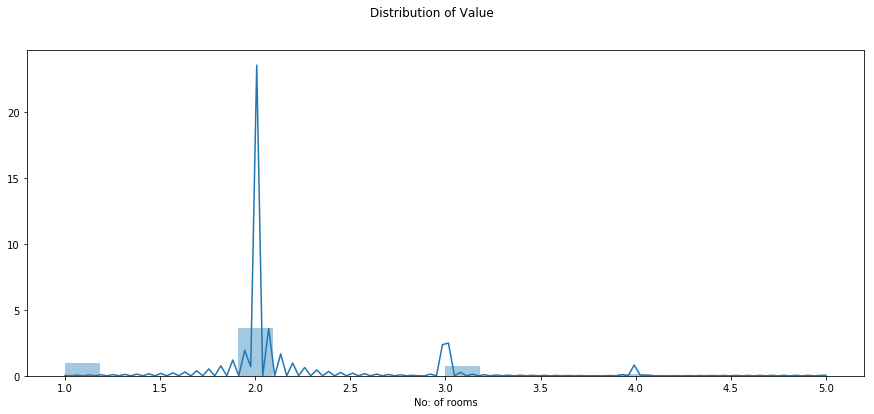

In [19]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,6))
fig.suptitle('Distribution of Value' )
x_axes = df['value'].dropna()
x = pd.Series(x_axis, name='No: of rooms')
ax = sns.distplot(x)

In [20]:
df['value'].describe()

count       436.000000
mean      37533.661697
std       43698.973768
min          60.000000
25%       15564.000000
50%       24672.000000
75%       41348.000000
max      449955.000000
Name: value, dtype: float64

In [21]:
df['yearUpdated'].value_counts()

2007.0    16
2008.0    14
2006.0    12
2010.0    10
2017.0    10
2015.0     9
2005.0     9
2012.0     8
2016.0     8
2013.0     8
2000.0     7
2014.0     7
2011.0     7
2009.0     6
2004.0     5
1995.0     3
2018.0     3
1929.0     3
2003.0     3
1970.0     2
1986.0     2
2001.0     2
1978.0     1
1999.0     1
1974.0     1
1965.0     1
1955.0     1
1960.0     1
1968.0     1
1975.0     1
1969.0     1
1990.0     1
Name: yearUpdated, dtype: int64

In [22]:
df.head()

,homeDescription,latitude,longitude,bedrooms,bathrooms,finishedSqFt,lotSizeSqFt,yearBuilt,yearUpdated,numFloors,parkingType,heatingSources,heatingSystem,rooms,value
zpid,,,,,,,,,,,,,,,
40000003,Beautifully maintained and landscaped home con...,40.649677,-74.389070,3.0,1.5,NaN,10454.0,1964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40000004,NaN,40.649500,-74.388788,4.0,2.5,1641.0,9583.0,1951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40000009,"Totally renovated colonial, open floor plan, h...",40.648488,-74.389920,4.0,2.5,1969.0,7501.0,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40000010,NEW PRICE!!!!! POSSIBILITIES ARE ENDLESS FOR S...,40.648331,-74.390096,3.0,2.0,1415.0,7405.0,1950.0,NaN,2.0,Garage - Attached,Gas,"Baseboard, Other","Office, Workshop, Family room, Laundry room",16980.0
40000012,Charming Cape Cod Style home with an Oversized...,40.648016,-74.390447,4.0,2.0,1356.0,7501.0,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#f['yearUpdated'].isnull()
sum(pd.isnull(df['numFloors']))

513

In [24]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [25]:
# Remove missing values
df = df.dropna(subset=['value'])


# Impute most frequent for categorical features
categorical_feats = df.select_dtypes(include=['object']).columns
df[categorical_feats] = DataFrameImputer().fit_transform(df[categorical_feats])

# Impute median for numerical features
num_feats = df.select_dtypes(include=[np.number]).columns
imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
df[num_feats] = imp.fit_transform(df[num_feats])

print("Dataframe has {} rows and {} columns.".format(*df.shape))

Dataframe has 436 rows and 15 columns.


In [26]:
df.isnull().values.any()

False

In [27]:
#Topic Model

# Seperate NLP features
nlp_feats = ['homeDescription']
corpus = df[nlp_feats]
df = df.drop(nlp_feats, axis = 1)
print("Dataframe has {} rows and {} columns.".format(*df.shape))

Dataframe has 436 rows and 14 columns.


In [28]:
import nltk

from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.models.ldamodel import LdaModel

import itertools
from collections import Counter
from collections import defaultdict

import json

C:\Users\anish\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [29]:
def preprocess_text(corpus):
    """Takes a corpus in list format and applies basic preprocessing steps of word tokenization,
     removing of english stop words, lower case and lemmatization."""
    processed_corpus = []
    english_words = set(nltk.corpus.words.words())
    english_stopwords = set(stopwords.words('english'))
    wordnet_lemmatizer = WordNetLemmatizer()
    tokenizer = RegexpTokenizer(r'[\w|!]+')
    for row in corpus:
        word_tokens = tokenizer.tokenize(row)
        word_tokens_lower = [t.lower() for t in word_tokens]
        word_tokens_lower_english = [t for t in word_tokens_lower if t in english_words or not t.isalpha()]
        word_tokens_no_stops = [t for t in word_tokens_lower_english if not t in english_stopwords]
        word_tokens_no_stops_lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in word_tokens_no_stops]
        processed_corpus.append(word_tokens_no_stops_lemmatized)
    return processed_corpus

In [30]:
def nlp_model_pipeline(processed_corpus):
    """Takes processed corpus and produce dictionary, doc_term_matrix and LDA model"""
    # Creates the term dictionary (every unique term in corpus is assigned an index)
    dictionary = Dictionary(processed_corpus)
    # Convert corpus into Document Term Matrix using dictionary prepared above
    doc_term_matrix = [dictionary.doc2bow(listing) for listing in processed_corpus]    
    return dictionary, doc_term_matrix

In [31]:
def LDA_topic_modelling(doc_term_matrix, dictionary, num_topics=3, passes=2):
    # Create an object for LDA model and train it on Document-Term-Matrix
    LDA = LdaModel
    ldamodel = LDA(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=passes)
    return ldamodel

In [32]:
def add_topics_to_df(ldamodel, doc_term_matrix, df, new_col, num_topics):
    # Convert into Per-document topic probability matrix:
    docTopicProbMat = ldamodel[doc_term_matrix]
    docTopicProbDf = pd.DataFrame(index=df.index, columns=range(0, num_topics))
    for i, doc in enumerate(docTopicProbMat):
        for topic in doc:
            docTopicProbDf.iloc[i, topic[0]] = topic[1]
    docTopicProbDf[new_col] = docTopicProbDf.idxmax(axis=1)
    df_topics = docTopicProbDf[new_col]
    # Merge with df
    df_new = pd.concat([df, df_topics], axis=1)
    return df_new

In [33]:
corpus.head()

,homeDescription
zpid,
40000010,NEW PRICE!!!!! POSSIBILITIES ARE ENDLESS FOR S...
40000018,Welcome home to this fabulous 1500 Sq Ft Henry...
40000025,Charming traditional elements and modern conve...
40000028,"Older 2 Family Home needs updating, located in..."
40000029,"Older 2 Family Home needs updating, located in..."


In [34]:
corpus_description = corpus['homeDescription'].astype(str)
processed_corpus_description = preprocess_text(corpus_description)
dictionary_description, doc_term_matrix_description = nlp_model_pipeline(processed_corpus_description)

In [35]:
print(dictionary_description)

Dictionary(1573 unique tokens: ['1', '1st', '2', '2nd', '9x7']...)


In [36]:
print(doc_term_matrix_description)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 5), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1)], [(8, 1), (17, 1), (19, 1), (24, 1), (26, 1), (28, 1), (31, 2), (32, 1), (36, 3), (41, 1), (45, 1), (46, 1), (54, 1), (56, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 4), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1),

In [37]:
ldamodel_description = LDA_topic_modelling(doc_term_matrix_description, dictionary_description, num_topics=3, passes=1)

In [38]:
print("Dataframe has {} rows and {} columns.".format(*df.shape))
df.head()

Dataframe has 436 rows and 14 columns.


,latitude,longitude,bedrooms,bathrooms,finishedSqFt,lotSizeSqFt,yearBuilt,yearUpdated,numFloors,parkingType,heatingSources,heatingSystem,rooms,value
zpid,,,,,,,,,,,,,,
40000010,40.648331,-74.390096,3.0,2.0,1415.0,7405.0,1950.0,2008.0,2.0,Garage - Attached,Gas,"Baseboard, Other","Office, Workshop, Family room, Laundry room",16980.0
40000018,40.648321,-74.389390,3.0,2.0,1610.0,7405.0,1960.0,2008.0,1.0,Garage - Attached,Gas,Forced air,Dining room,9660.0
40000025,40.646639,-74.388248,3.0,2.0,1289.0,6969.0,1925.0,2001.0,4.0,Garage - Detached,Gas,Baseboard,"Family room, Pantry",30936.0
40000028,40.647154,-74.387803,5.0,4.0,3993.0,21052.0,2013.0,2013.0,2.0,Garage - Attached,Gas,Forced air,"Dining room, Family room, Laundry room, Master...",159720.0
40000029,40.647189,-74.387409,4.0,3.0,1712.0,11848.0,1932.0,2008.0,2.0,Garage - Detached,Gas,Forced air,"Dining room, Family room, Master bath, Mud room",41088.0


In [39]:
# Dummy encoding
categorical_feats = ['parkingType', 'heatingSources', 'heatingSystem','rooms' ]
df = pd.get_dummies(df, columns=categorical_feats, drop_first=False)
print("Dataframe has {} rows and {} columns.".format(*df.shape))

Dataframe has 436 rows and 237 columns.


In [40]:
# Create response and target variable
target = 'value'
X = df.drop(target, axis=1)
y = df[target]

In [41]:
# Train test split
test_size = 0.2
seed = 50

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [42]:
#Linear Regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
# Make predictions using the testing set
regr_y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, regr_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, regr_y_pred))

Mean squared error: 699335947.87
Variance score: 0.45


In [45]:
# BOW across all listings
bow = Counter(itertools.chain(*processed_corpus_description))
bow.most_common(20)

[('home', 403),
 ('room', 331),
 ('2', 290),
 ('train', 257),
 ('family', 255),
 ('3', 244),
 ('walk', 229),
 ('close', 227),
 ('kitchen', 214),
 ('shopping', 197),
 ('bus', 187),
 ('well', 183),
 ('new', 181),
 ('neighborhood', 181),
 ('center', 180),
 ('convenient', 171),
 ('need', 169),
 ('floor', 168),
 ('block', 166),
 ('prime', 160)]

In [46]:
# Top 5 BOW per listing
doc = doc_term_matrix_description[435]
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)
for word_id, word_count in bow_doc[:5]:
    print(dictionary_description.get(word_id), word_count)

home 2
basement 2
room 2
full 2
half 2


In [47]:
# Total frequency across all listings
totalfreq = defaultdict(int)
for word_id, freq in itertools.chain.from_iterable(doc_term_matrix_description):
    totalfreq[word_id] += freq

In [48]:
# TF-IDF model fitted on corpus, showing per doc
tfidf = TfidfModel(doc_term_matrix_description)
tfidf_weights = tfidf[doc]
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)
print(sorted_tfidf_weights[:5])
print(dictionary_description.get(198))

[(183, 0.2581147398173826), (1567, 0.23277729568994798), (1568, 0.23277729568994798), (1569, 0.23277729568994798), (1570, 0.23277729568994798)]
key
